**Import Necessary Libraries**
---



- Dataset is taken from kaggle . The file is too large to upload on github

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

In [14]:

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nltk.download('stopwords')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Load Data**

In [16]:
raw_data = pd.read_csv("/content/sample_data/IMDB_reviews.csv")
raw_data.head()

,URL,Title,Release Year,Poster,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User,Review Date,Review Author
0,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"22,67,031",$37.03M,A great movie you can watch again and again,Because you'll probably be confused the first ...,10-Oct,11-Feb-20,Pukeonthestreet
1,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"22,67,031",$37.03M,Superb,"Superb, and truly one of the greatest movies o...",10-Oct,19-Apr-14,grantss
2,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"22,67,031",$37.03M,"Crazy, Cult, Plot Twist, Awesome = Fight Club",I have no words about this film. This is maste...,10-Oct,28-Jul-21,jack_o_hasanov_imdb
3,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"22,67,031",$37.03M,Welcome to movie heaven!,"Let's ignore the advice and talk about ""Fight ...",10-Oct,16-Dec-13,gogoschka-1
4,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"22,67,031",$37.03M,Crazy good,"So rewatchable. The acting is amazing, the sto...",10-Oct,12-Oct-19,trosati-98923


In [17]:
raw_data.drop(["URL","Poster","Review Date","Review Author"],axis = 1, inplace = True)

In [18]:
raw_data.head()

,Title,Release Year,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User
0,Fight Club,1999,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"22,67,031",$37.03M,A great movie you can watch again and again,Because you'll probably be confused the first ...,10-Oct
1,Fight Club,1999,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"22,67,031",$37.03M,Superb,"Superb, and truly one of the greatest movies o...",10-Oct
2,Fight Club,1999,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"22,67,031",$37.03M,"Crazy, Cult, Plot Twist, Awesome = Fight Club",I have no words about this film. This is maste...,10-Oct
3,Fight Club,1999,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"22,67,031",$37.03M,Welcome to movie heaven!,"Let's ignore the advice and talk about ""Fight ...",10-Oct
4,Fight Club,1999,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"22,67,031",$37.03M,Crazy good,"So rewatchable. The acting is amazing, the sto...",10-Oct


In [19]:
# Checking for missing values
raw_data.isnull().sum()
raw_data = raw_data.dropna()
raw_data['Rating By User'] = raw_data['Rating By User'].str.extract('(\d+)').astype(int)
raw_data['Rating By User'].dtype

dtype('int64')

In [20]:
row_neut = raw_data[(raw_data["Rating By User"] >= 4) & (raw_data["Rating By User"] <= 6)].sample(2500)
row_pos = raw_data[raw_data["Rating By User"] > 6].sample(2500)
row_neg = raw_data[raw_data["Rating By User"] < 4].sample(2500)

In [21]:
# Concatenate data
data = pd.concat([row_neut, row_pos, row_neg], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 7684 to 6198
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           7500 non-null   object 
 1   Release Year    7500 non-null   int64  
 2   Genre           7500 non-null   object 
 3   Director        7500 non-null   object 
 4   Cast            7500 non-null   object 
 5   Length          7500 non-null   object 
 6   IMDB Rating     7500 non-null   float64
 7   Metascore       7500 non-null   float64
 8   Votes           7500 non-null   object 
 9   Gross           7500 non-null   object 
 10  Review Title    7500 non-null   object 
 11  Review Text     7500 non-null   object 
 12  Rating By User  7500 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 820.3+ KB


In [22]:
sample_text = data.iloc[400]["Review Text"]
print(sample_text)
# Took sample text from data to delete last part (-Was this review helpful? Sign in to vote.-)

If you want to see a great movie watch Zack Snyder's justice league and skip whatever this was. Yeah it's long but al least it's conveniently split into parts and is just so much better.Here the characters are bland and their motives are confusing as hell. I had trouble answering my bfs question who I liked best because tbh I didn't like anyone and it was hard to sympathize with them.The girl had hysterics the whole time, she was with dr but he didn't **** her good so she left for mr-not-Batman-but-Batman but then she left with dr to Mars so he can save the earth ... what? Also, what's her superpower is? Being pretty? I really have no other option, after watching the movie I still don't know.Dr Manhattan is just as confusing. They were painting him almost a sociopath at first, but then his confession to the girl on Mars just made my bf and I laugh out loud. So out of character and just so out of place. Also he's way to naive for a guy who is almost like a god.I read somewhere a quote t

In [23]:
print(len("Was this review helpful?  Sign in to vote.                        Permalink"))
# Learned length of it

75


In [24]:
data['Review Text'] = data['Review Text'].apply(lambda x: x[:-173].strip() if x[-75:] == "Was this review helpful?  Sign in to vote.                        Permalink" else x)
# Deleted it using lambda function, now review data is usable.

In [25]:
data.head()

,Title,Release Year,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User
7684,Midsommar,2019,"Drama, Horror, Mystery",Ari Aster,"['Florence Pugh', 'Jack Reynor', 'Vilhelm Blom...",2h 28m,7.1,72.0,"3,82,266",$27.33M,Meh,"On Amazon's reviews, people who hate or were u...",5
44374,Apocalypse Now,1979,"Drama, Mystery, War",Francis Ford Coppola,"['Martin Sheen', 'Marlon Brando', 'Robert Duva...",2h 27m,8.4,94.0,"6,98,637",$83.47M,"Apocalypse, I wanted to love you...",Where do I start? It's a long movie. I've seen...,5
47317,Sin City,2005,"Crime, Thriller",sFrank MillerQuentin TarantinoRobert Rodriguez,"['Mickey Rourke', 'Clive Owen', 'Bruce Willis']",2h 4m,8.0,74.0,"7,88,061",$74.10M,Nasty,I went to see this movie because I read it's p...,6
50866,Alien,1979,"Horror, Sci-Fi",Ridley Scott,"['Sigourney Weaver', 'Tom Skerritt', 'John Hurt']",1h 57m,8.5,89.0,"9,31,310",$78.90M,The alien within?,"Despite it's legendary status, the truth is th...",6
55139,The Big Lebowski,1998,"Comedy, Crime",sJoel CoenEthan Coen,"['Jeff Bridges', 'John Goodman', 'Julianne Moo...",1h 57m,8.1,71.0,"8,47,242",$17.50M,"Has its moments,but nothing great",This is a decent movie with a funny concept bu...,6


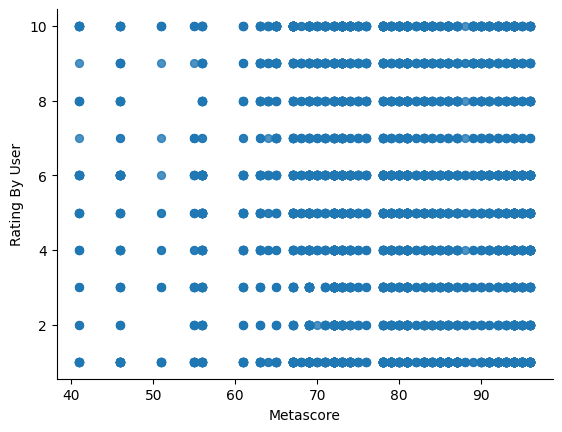

In [26]:
# @title Metascore vs Rating By User

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Metascore', y='Rating By User', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

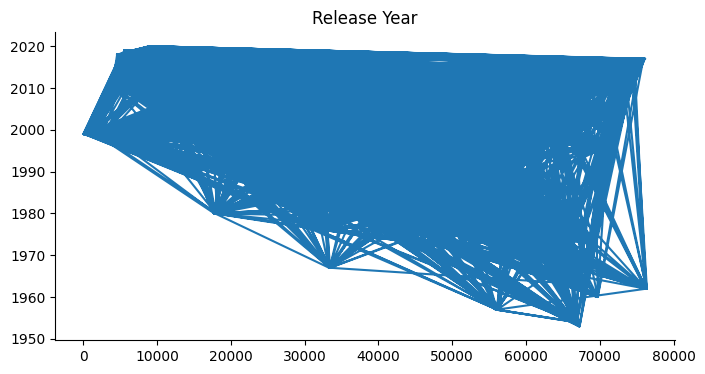

In [27]:
# @title Release Year

from matplotlib import pyplot as plt
data['Release Year'].plot(kind='line', figsize=(8, 4), title='Release Year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [28]:
# Random Review Text with 2116'th Row.
sample_sentence = data['Review Text'].iloc[2116]
print(sample_sentence)

Well, I fell for the hype after noticing that Memento had been voted into the All Time Top Ten and rented the DVD. What a waste of time.  Not since Oliver Stone's "Natural Born Killers" have I've seen such an example of technique masquerading as a movie.Ooh. The movie starts from the end, how cool and original.  I suspect few movie devotees would have been nearly as interested if the film has been in normal linear mode.  After straining to notice each hidden clue, I was dumbfounded when this "classic" ended.  The star - Guy Pierce - gave a wooden "Keanu" performance, although in all fairness, he was given little to work with.  I couldn't give a damn about any of the characters.  The constant cut backs became mind numbingly annoying.  No, I did NOT enjoy this movie.News flash.  The emperor had no clothes and this movie stunk!


# **Word Tokenization using punkt**

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
tokens = word_tokenize(sample_sentence)
print(tokens)
print("....")
tokens = [word.lower() for word in tokens if word.isalpha()]
print(tokens)
# Transforming sentence to lowerCase

['Well', ',', 'I', 'fell', 'for', 'the', 'hype', 'after', 'noticing', 'that', 'Memento', 'had', 'been', 'voted', 'into', 'the', 'All', 'Time', 'Top', 'Ten', 'and', 'rented', 'the', 'DVD', '.', 'What', 'a', 'waste', 'of', 'time', '.', 'Not', 'since', 'Oliver', 'Stone', "'s", '``', 'Natural', 'Born', 'Killers', "''", 'have', 'I', "'ve", 'seen', 'such', 'an', 'example', 'of', 'technique', 'masquerading', 'as', 'a', 'movie.Ooh', '.', 'The', 'movie', 'starts', 'from', 'the', 'end', ',', 'how', 'cool', 'and', 'original', '.', 'I', 'suspect', 'few', 'movie', 'devotees', 'would', 'have', 'been', 'nearly', 'as', 'interested', 'if', 'the', 'film', 'has', 'been', 'in', 'normal', 'linear', 'mode', '.', 'After', 'straining', 'to', 'notice', 'each', 'hidden', 'clue', ',', 'I', 'was', 'dumbfounded', 'when', 'this', '``', 'classic', "''", 'ended', '.', 'The', 'star', '-', 'Guy', 'Pierce', '-', 'gave', 'a', 'wooden', '``', 'Keanu', "''", 'performance', ',', 'although', 'in', 'all', 'fairness', ',', 'he

In [31]:
stop_words = set(stopwords.words('english'))

In [32]:
data = data.dropna()
# Drop the null values.

In [33]:
# Converting the hours and minutes of length to minutes and returning it.
def findMinute(x):
    x_splitted = x.split()
    if len(x_splitted) > 1:
        return int(x_splitted[0].replace('h', '')) * 60 + int(x_splitted[1].replace('m', ''))
    else:
        return int(x_splitted[0].replace('h', '')) * 60

data["Length"] = data['Length'].apply(lambda x: findMinute(x))
data['Length'].dtype


dtype('int64')

In [36]:
data['Release Year'] = data['Release Year'].apply(pd.to_numeric)
data['Release Year'].dtype
# Check the column type

dtype('int64')

In [37]:
data['Review Text'] = data['Review Text'].astype(str)
data['Review Text'].dtype
# Check the column type

dtype('O')

In [38]:
data['Director']=data['Director'].replace('sEthan CoenJoel Coen','Coen Brothers').replace('sJoel CoenEthan Coen','Coen Brothers')
data['Director'].dtype
# Check the column type

dtype('O')

In [39]:
data['Votes'] = data['Votes'].replace(',','').apply(pd.to_numeric,errors='coerce')
data['Votes'].dtype
# Check the column type

dtype('float64')

In [40]:
data['IMDB Rating'] = data['IMDB Rating'].apply(pd.to_numeric, errors='coerce')
data['IMDB Rating'].dtype
# Check the column type

dtype('float64')

In [41]:
data[['Release Year', 'Review Text', 'Director', 'Votes', 'IMDB Rating']].dtypes
print(data['Release Year'].dtype)
print(data['Review Text'].dtype)
print(data['Director'].dtype)
print(data['Votes'].dtype)
print(data['IMDB Rating'].dtype)

int64
object
object
float64
float64


In [42]:
stop_words = set(stopwords.words('english'))
# Stop words will be removed from texts

In [43]:
# Function to remove stop words and lemmatize a text
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatize_words(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [44]:
# Function to lemmatize words
def lemmatize_words(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

In [45]:
data['Review Text'] = data['Review Text'].apply(preprocess_text)
data[['Review Text']]
# Process the data

,Review Text
7684,amazon review people hate unimpressed film nec...
44374,start long movie seen hour version apparently ...
47317,went see movie read production style similar c...
50866,despite legendary status truth alien horror mo...
55139,decent movie funny concept could much better a...
...,...
21053,killed valuable life watching relate bd film q...
49560,seen probably film life hated film sure inept ...
36316,yawning movie make slow boring understand got ...
5996,cheap use combination image tone sound create ...


In [46]:
data.head()
# Check the data for looking at changes.

,Title,Release Year,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User
7684,Midsommar,2019,"Drama, Horror, Mystery",Ari Aster,"['Florence Pugh', 'Jack Reynor', 'Vilhelm Blom...",148,7.1,72.0,NaN,$27.33M,Meh,amazon review people hate unimpressed film nec...,5
44374,Apocalypse Now,1979,"Drama, Mystery, War",Francis Ford Coppola,"['Martin Sheen', 'Marlon Brando', 'Robert Duva...",147,8.4,94.0,NaN,$83.47M,"Apocalypse, I wanted to love you...",start long movie seen hour version apparently ...,5
47317,Sin City,2005,"Crime, Thriller",sFrank MillerQuentin TarantinoRobert Rodriguez,"['Mickey Rourke', 'Clive Owen', 'Bruce Willis']",124,8.0,74.0,NaN,$74.10M,Nasty,went see movie read production style similar c...,6
50866,Alien,1979,"Horror, Sci-Fi",Ridley Scott,"['Sigourney Weaver', 'Tom Skerritt', 'John Hurt']",117,8.5,89.0,NaN,$78.90M,The alien within?,despite legendary status truth alien horror mo...,6
55139,The Big Lebowski,1998,"Comedy, Crime",Coen Brothers,"['Jeff Bridges', 'John Goodman', 'Julianne Moo...",117,8.1,71.0,NaN,$17.50M,"Has its moments,but nothing great",decent movie funny concept could much better a...,6


In [47]:
# Turn the numerical data into categorical data
def bin_sentiment(score):
    if score >= 4 and score<= 6:
        return 'neutral'
    elif score <4:
        return 'negative'
    else:
        return 'positive'

In [48]:
# Apply the above function to the data
data['Sentiment Category'] = data['Rating By User'].apply(bin_sentiment)
data[['Review Text', 'Rating By User', 'Sentiment Category']]

,Review Text,Rating By User,Sentiment Category
7684,amazon review people hate unimpressed film nec...,5,neutral
44374,start long movie seen hour version apparently ...,5,neutral
47317,went see movie read production style similar c...,6,neutral
50866,despite legendary status truth alien horror mo...,6,neutral
55139,decent movie funny concept could much better a...,6,neutral
...,...,...,...
21053,killed valuable life watching relate bd film q...,1,negative
49560,seen probably film life hated film sure inept ...,1,negative
36316,yawning movie make slow boring understand got ...,1,negative
5996,cheap use combination image tone sound create ...,1,negative


from matplotlib import pyplot as plt
_df_0['Rating By User'].plot(kind='hist', bins=20, title='Rating By User')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Sentiment Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rating By User'].plot(kind='line', figsize=(8, 4), title='Rating By User')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Sentiment Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Rating By User', y='Sentiment Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

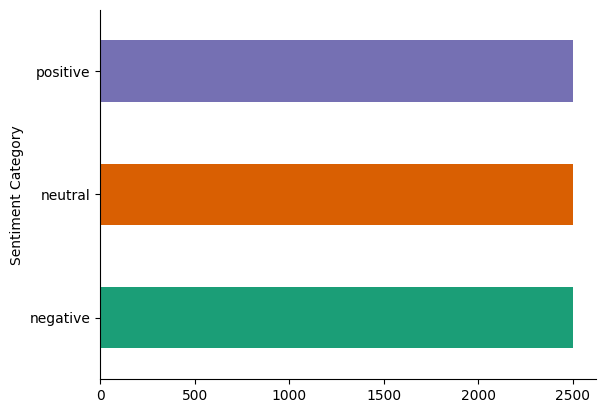

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Sentiment Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

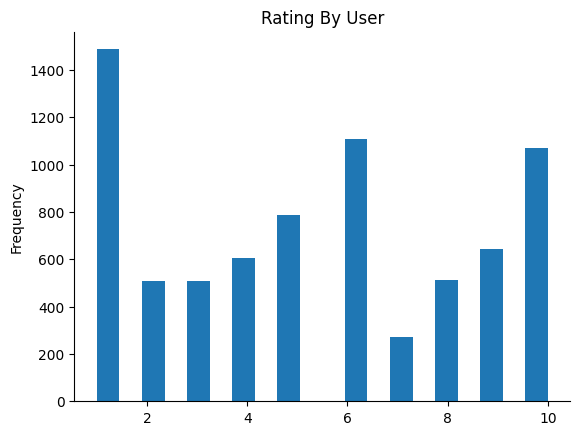

In [52]:
from matplotlib import pyplot as plt
_df_0['Rating By User'].plot(kind='hist', bins=20, title='Rating By User')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
data.head()

,Title,Release Year,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User,Sentiment Category
7684,Midsommar,2019,"Drama, Horror, Mystery",Ari Aster,"['Florence Pugh', 'Jack Reynor', 'Vilhelm Blom...",148,7.1,72.0,NaN,$27.33M,Meh,amazon review people hate unimpressed film nec...,5,neutral
44374,Apocalypse Now,1979,"Drama, Mystery, War",Francis Ford Coppola,"['Martin Sheen', 'Marlon Brando', 'Robert Duva...",147,8.4,94.0,NaN,$83.47M,"Apocalypse, I wanted to love you...",start long movie seen hour version apparently ...,5,neutral
47317,Sin City,2005,"Crime, Thriller",sFrank MillerQuentin TarantinoRobert Rodriguez,"['Mickey Rourke', 'Clive Owen', 'Bruce Willis']",124,8.0,74.0,NaN,$74.10M,Nasty,went see movie read production style similar c...,6,neutral
50866,Alien,1979,"Horror, Sci-Fi",Ridley Scott,"['Sigourney Weaver', 'Tom Skerritt', 'John Hurt']",117,8.5,89.0,NaN,$78.90M,The alien within?,despite legendary status truth alien horror mo...,6,neutral
55139,The Big Lebowski,1998,"Comedy, Crime",Coen Brothers,"['Jeff Bridges', 'John Goodman', 'Julianne Moo...",117,8.1,71.0,NaN,$17.50M,"Has its moments,but nothing great",decent movie funny concept could much better a...,6,neutral


# **Vectorizer**

<div style="color: White; padding: 10px; font-size: larger">
    <strong>I used PCA to reduce dimensions in our vectorized text array. Then we took the first two element of array and set them pca component 1 and component 2. In the other step I create two columns in the data "PCA1" and "PCA2". Using these columns we visualize the clustering in three cluster.</strong>
</div>

[[0.         0.46941728 0.61722732 0.3645444  0.         0.
  0.3645444  0.         0.3645444 ]
 [0.         0.7284449  0.         0.28285122 0.         0.47890875
  0.28285122 0.         0.28285122]
 [0.49711994 0.         0.         0.29360705 0.49711994 0.
  0.29360705 0.49711994 0.29360705]]

 ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


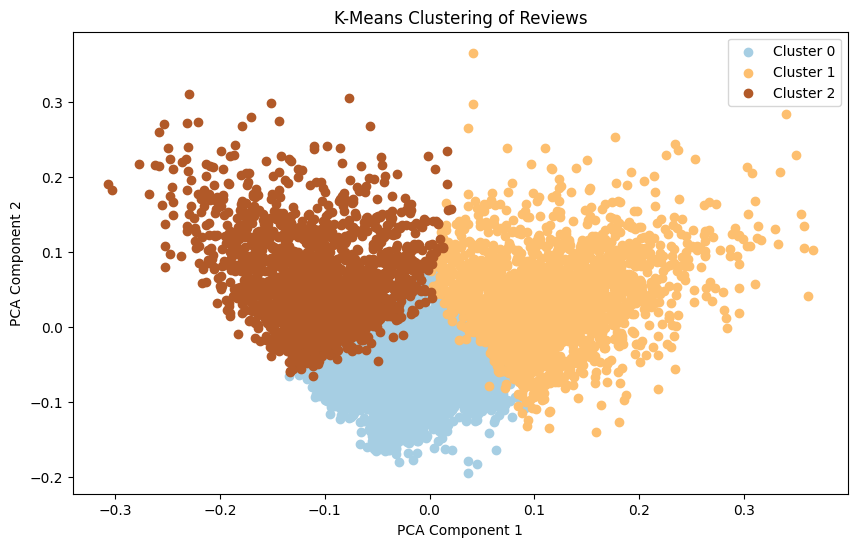

,Title,Release Year,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User,Sentiment Category,Cluster,PCA1,PCA2
7684,Midsommar,2019,"Drama, Horror, Mystery",Ari Aster,"['Florence Pugh', 'Jack Reynor', 'Vilhelm Blom...",148,7.1,72.0,NaN,$27.33M,Meh,amazon review people hate unimpressed film nec...,5,neutral,2,-0.087089,0.116330
44374,Apocalypse Now,1979,"Drama, Mystery, War",Francis Ford Coppola,"['Martin Sheen', 'Marlon Brando', 'Robert Duva...",147,8.4,94.0,NaN,$83.47M,"Apocalypse, I wanted to love you...",start long movie seen hour version apparently ...,5,neutral,0,0.011310,-0.068664
47317,Sin City,2005,"Crime, Thriller",sFrank MillerQuentin TarantinoRobert Rodriguez,"['Mickey Rourke', 'Clive Owen', 'Bruce Willis']",124,8.0,74.0,NaN,$74.10M,Nasty,went see movie read production style similar c...,6,neutral,0,0.003895,-0.055706
50866,Alien,1979,"Horror, Sci-Fi",Ridley Scott,"['Sigourney Weaver', 'Tom Skerritt', 'John Hurt']",117,8.5,89.0,NaN,$78.90M,The alien within?,despite legendary status truth alien horror mo...,6,neutral,0,-0.066603,-0.071255
55139,The Big Lebowski,1998,"Comedy, Crime",Coen Brothers,"['Jeff Bridges', 'John Goodman', 'Julianne Moo...",117,8.1,71.0,NaN,$17.50M,"Has its moments,but nothing great",decent movie funny concept could much better a...,6,neutral,0,0.035575,-0.037778


In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Sample documents to understand vectorization
documents = ["This is the first document.", "This document is the second document.", "And this is the third one."]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
print(X.toarray())
feature_names = vectorizer.get_feature_names_out()
print("\n", feature_names)

# Prepare the text data
text_data = data['Review Text']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(text_data)

# Apply K-Means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Visualize the clusters using PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_matrix.toarray())
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(np.linspace(0, 1, k))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], color=colors[cluster], label=f'Cluster {cluster}')

plt.title('K-Means Clustering of Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Display the first few rows of the dataframe
data.head()


<ipython-input-61-a73f09642ae4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Metascore', y='Sentiment Category', inner='box', palette='Dark2')


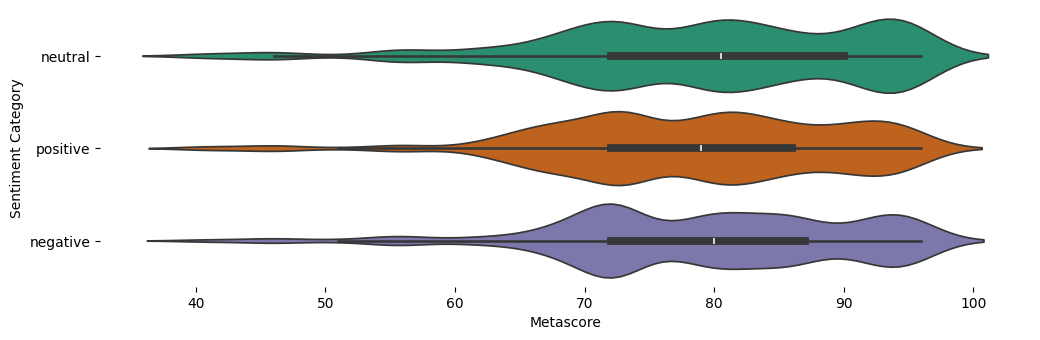

In [61]:
# @title Sentiment Category vs Metascore

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Sentiment Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Metascore', y='Sentiment Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Logistic Regression Model**


Classifier: Logistic Regression
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.69      0.71       500
     neutral       0.61      0.57      0.59       500
    positive       0.73      0.81      0.77       500

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500



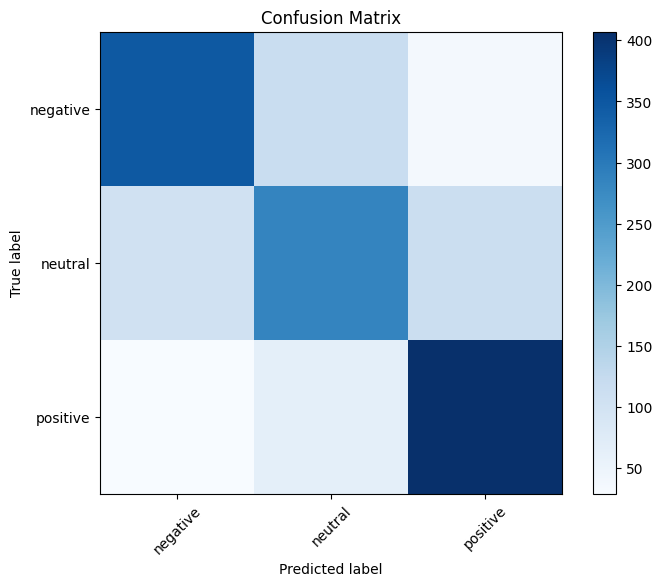

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Combine the data splitting, TF-IDF vectorization, model training, and evaluation into a single pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

# Prepare the data
X = data['Review Text']
y = data['Sentiment Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"\nClassifier: Logistic Regression")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# **KNN Classfication Model**

Best k value: 13


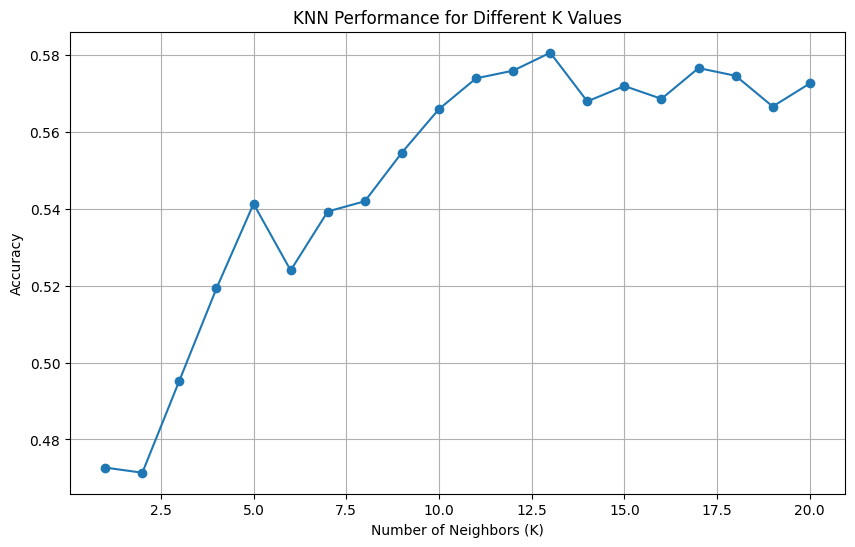


Classifier: K-Nearest Neighbors (Best K)
Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

    negative       0.66      0.61      0.63       500
     neutral       0.52      0.43      0.47       500
    positive       0.56      0.70      0.62       500

    accuracy                           0.58      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.58      0.58      0.58      1500



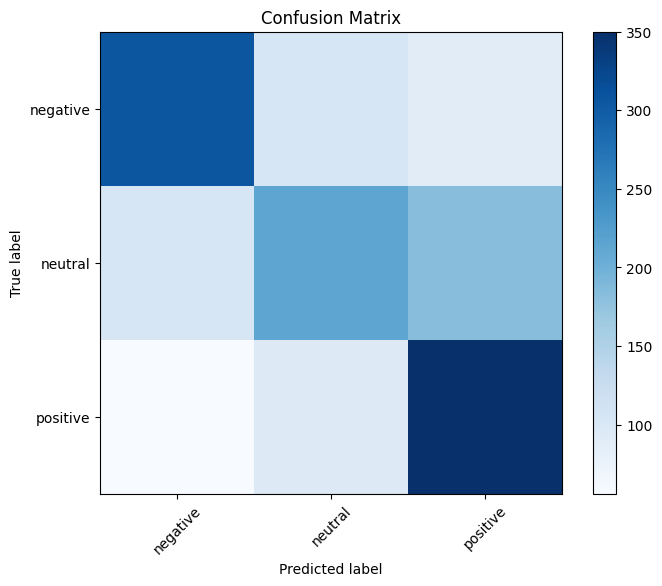

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the data
X = data['Review Text']
y = data['Sentiment Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

k_values = np.arange(1, 21)
accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_tfidf, y_train)
    y_pred = knn_classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")

# Plot accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Performance for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Train the model with the best k value
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_best = best_knn_classifier.predict(X_test_tfidf)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nClassifier: K-Nearest Neighbors (Best K)")
print(f"Accuracy: {accuracy_best:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
